In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [51]:
data = pd.read_excel('Combineddata.xlsx', usecols=['Crop', 'Wholesale rate(kg/pcs)'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Crop                    75 non-null     object
 1   Wholesale rate(kg/pcs)  80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [53]:
data.head()

,Crop,Wholesale rate(kg/pcs)
0,Sweet Potato,15
1,Couard Greens,18
2,Sweet Dumpling Squash,25
3,Capsicum(Bell Pepper),28
4,Garlic,80


In [54]:
data.tail()

,Crop,Wholesale rate(kg/pcs)
75,NaN,33
76,NaN,34
77,NaN,22
78,NaN,49
79,NaN,103


In [55]:
data.dropna(how='any', inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Crop                    75 non-null     object
 1   Wholesale rate(kg/pcs)  75 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


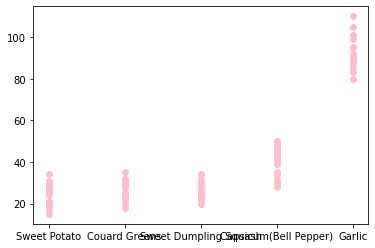

In [57]:
plt.scatter(data['Crop'], data['Wholesale rate(kg/pcs)'], color='pink')

In [58]:
data['Crop'].value_counts()

Garlic                   15
Capsicum(Bell Pepper)    15
Sweet Dumpling Squash    15
Couard Greens            15
Sweet Potato             15
Name: Crop, dtype: int64

In [59]:
crop = pd.get_dummies(data['Crop'], drop_first=True)
crop.head()

,Couard Greens,Garlic,Sweet Dumpling Squash,Sweet Potato
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,1,0,0


In [69]:
crop.tail()

,Couard Greens,Garlic,Sweet Dumpling Squash,Sweet Potato
70,0,0,0,1
71,1,0,0,0
72,0,0,1,0
73,0,0,0,0
74,0,1,0,0


In [60]:
data.drop(['Crop'], inplace=True, axis=1)

In [61]:
data['Wholesale rate(kg/pcs)']

0      15
1      18
2      25
3      28
4      80
     ... 
70     34
71     32
72     25
73     45
74    110
Name: Wholesale rate(kg/pcs), Length: 75, dtype: int64

In [62]:
data.shape

(75, 1)

In [63]:
crop.shape

(75, 4)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(crop, data['Wholesale rate(kg/pcs)'],
                                                   test_size=0.3)

In [71]:
X_train.shape

(52, 4)

In [72]:
X_test.shape

(23, 4)

In [73]:
y_train.shape

(52,)

In [74]:
y_test.shape

(23,)

In [75]:
y_train

60     28
59     90
26     25
49    101
37     25
46     25
66     35
13     30
16     24
53     42
8      29
56     32
23     32
29     90
2      25
25     24
41     29
50     31
71     32
45     30
18     34
43     44
68     50
20     20
35     25
63     48
48     46
70     34
22     34
31     28
57     20
47     23
14     85
74    110
51     28
40     27
24     92
67     23
33     39
42     26
64     95
4      80
0      15
11     22
21     28
32     23
6      20
44    105
61     30
17     30
19     89
65     30
Name: Wholesale rate(kg/pcs), dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [ ]:
LinReg.fit(X_train, y_train)